# PyTorch Cheat Sheet

In [1]:
import torch
from torch import nn

## Overview
1. Tensors and Tensor Shapes
- Creating a Tensor
- Creating a Tensor of 0s and 1s
- Reshaping a Tensor

2. Tensor Operations & Activation Functions
- Common Activation Functions
- Common Tensor Operations

3. Neural Networ Layers
- The Linear Layer
- The Convolutional Layer

4. Example Neural network
- Creating a Basic Network
- Basic PyTorch Training Loop

## 1. Tensors and Tensor Shapes

### Creating a Tensor
Tensors can be created by passing a sequence (a.g. a list) of numericals or an individual numerical to the `torch.tensor`  constructor. An additional `dtype` keyword argument can be used to set the dtype of the constructed tensor. If not specified, the `dtype` is inferred from the input, typically defaulting to `torch.float32`.

In [2]:
tensor_0d = torch.tensor(3)
tensor_0d

tensor(3)

In [3]:
tensor_1d = torch.tensor([1, 2, 3], dtype=torch.float32)
tensor_1d

tensor([1., 2., 3.])

In [4]:
tensor_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor_2d

tensor([[1, 2, 3],
        [4, 5, 6]])

### Creating a Tensor of 0s or 1s
One can quickly create a tensor of a singl erepeated value by utilizing `torch.ones` or `torch.zeros`. These constructors take a size (i.e. shape) and dtype as as arguments. Note, that `torch.ones` can be used to intitialize a torch tensor of any constant value by multiplying it with the constant values

In [5]:
shape = (10, 3)  # 10 rows, 3 columns, size = (10 * 3) = 30

zeros = torch.zeros(shape)
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [6]:
ones = torch.ones(shape)
ones

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [7]:
fives = torch.ones(shape) * 5.
fives

tensor([[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]])

### Reshapeing a tensor
A tensor can be reshaped in the same way as a numpy array can be reshaped, by using the tensor's `reshape` method. Note, that the tensors new shape will need to be aligned with the size of the tensor (e.g. a tensor of shape (1, 2) cannot be reshaped into (5, 2)). Furthermore, note that a (-1) represents an arbitraary axis size. E.g. a shape of (-1, 2) indicates to reshape, that the new shape should consist of 2 columns and the number of rows should be set to accommodate that.

In [8]:
new_shape = (5, 6)  # This shape can accommdate all tensors of size 30
new_shape_wrong = (4, 6)  # This shape can only accommodate tensors of size 24
new_shape_arbitrary = (-1, 5)  # This shape can accommodate all tensors, the size of which is a multiple of 5 

In [9]:
ones.reshape(new_shape)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [10]:
# This will fail as the size of the tensor (30) is unequal to the implied size of the reshaped tensor (24)
try:
    ones.reshape(new_shape_wrong)
except RuntimeError as e:
    print(e)

shape '[4, 6]' is invalid for input of size 30


In [11]:
ones.reshape(new_shape_arbitrary)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### Flattening a Tensor
In the special case of a tensor being reshaped into a 1d tensor, one can use `tensor.reshape(-1)` or `nn.Flatten()(tensor)`, although the second option is slightly more computationally efficient.

## 2. Tensor Operations & Activation Functions
Activation functions are used to introduce non-linearity into a neural network. Simply put, each layer in a neural network is a linear function, and an arbitrarily complex sequence of linear functions would itself be a linear function. To allow a network to capture non-linear relationships, activation functions are often placed after each layer of a network.

### Common Activation Functions
Common activation functions include:
- ReLU

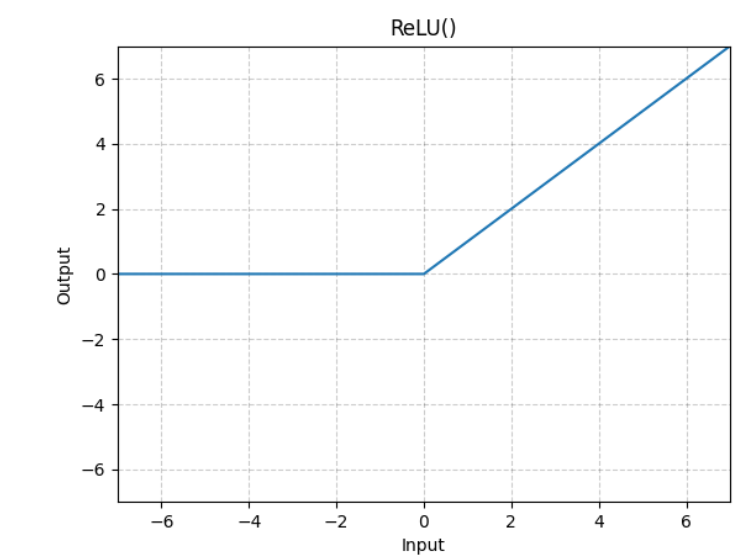
- Softplus

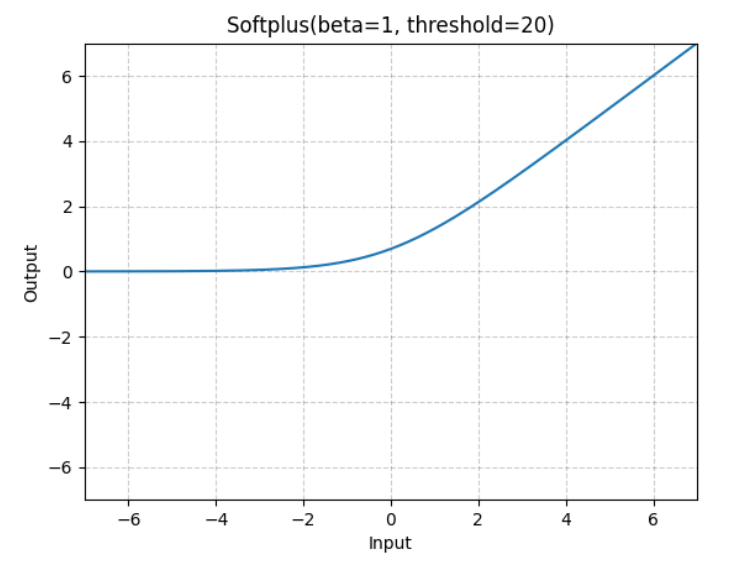
- Sigmoid

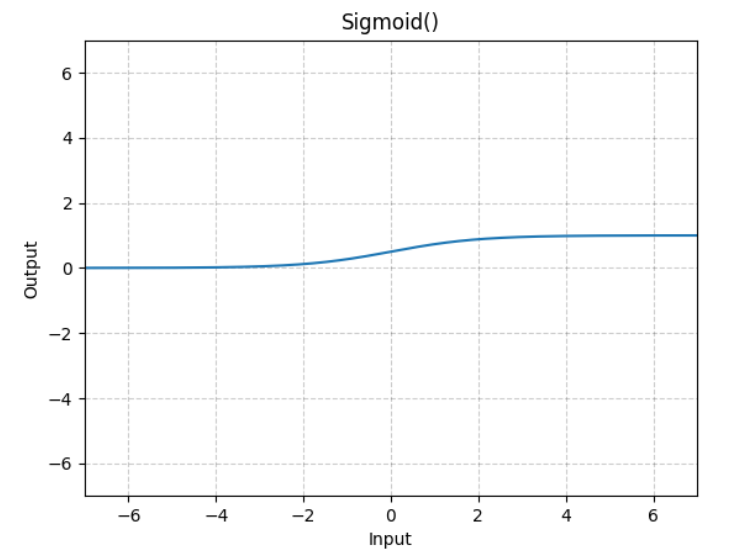

There are many more activation functions. There is no hard and fast rule when to use which activation function. Depending on the use case, one often needs to experiment with different activation functions to achieve the best results, but typically ReLU and/or Softplus are reasonable starting points for further experimentation. Sigmoid is commonly used on the output of the final layer, when the output needs to be constrained between 0 and 1 (e.g. for classification problems).

In [12]:
# Example tensor to which we can apply our activation functions
before = torch.tensor([-2, -1, 0, 1, 2], dtype=torch.float32)

# Initialize activation functions from PyTorch's nn Module
softplus = nn.Softplus()
relu = nn.ReLU()
sigmoid = nn.Sigmoid()

In [13]:
relu(before)

tensor([0., 0., 0., 1., 2.])

In [14]:
softplus(before)

tensor([0.1269, 0.3133, 0.6931, 1.3133, 2.1269])

In [15]:
sigmoid(before)

tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])

### Common Tensor Operations
PyTorch provides numerous tensor operations, the usage of which ensures an efficient gradient estimation, so it is recommended to use them whenever possible.
Two important tensor operations are:
- `torch.cat` to concatenate a sequence of tensors; note that the default axis for concatenation is the leftmost axis of the tensors.
- `torch.exp` to calculate the exponentiation of a tensor

In [16]:
tensors = [torch.zeros([1, 2]), torch.ones([1, 2]), torch.ones([1, 2]) * 2]
tensors

[tensor([[0., 0.]]), tensor([[1., 1.]]), tensor([[2., 2.]])]

In [17]:
concatenated_tensor = torch.cat(tensors, axis=0)
concatenated_tensor

tensor([[0., 0.],
        [1., 1.],
        [2., 2.]])

In [18]:
torch.exp(concatenated_tensor)

tensor([[1.0000, 1.0000],
        [2.7183, 2.7183],
        [7.3891, 7.3891]])

## 3. Neural Network Layers
A neural network typically consists of one or more sequences of layers. Depending on the task the type of layers to use at various points within the network is a design choice, and often evolves with experimentation.

### The Linear Layer
The Linear Layer is a typical starting point, and usually well suited for structured data. Its input is expected to be a 1D tensor (ignoring the batch dimension) and the output will also be a 1d tensor, although typically of a different size. When initializing a linear layer, the user needs to specify the number of input features that the linear layer should expect and the number of output features. Upon initialization, the weights of the linear layer (i.e. the coefficients) will be initialized with a random value.

In [19]:
samples = 10
input_features = 3
ouput_features = 1
input_tensor = torch.ones(samples, input_features) # Batch of ten with 3 features

encoder = nn.Linear(in_features=input_features, out_features=ouput_features)
encoder(input_tensor)

tensor([[0.6347],
        [0.6347],
        [0.6347],
        [0.6347],
        [0.6347],
        [0.6347],
        [0.6347],
        [0.6347],
        [0.6347],
        [0.6347]], grad_fn=<AddmmBackward0>)

To invert a linear layer (e.g. as part of a encoder-decoder system), you just have to use another linear layer while swapping the input with the output features.

In the below example, please note, that the layers are not trained and their weights are therefore random. Thus, the inversion only re-creates the original input shape, but not the input values.

In [20]:
decoder = nn.Linear(in_features=ouput_features, out_features=input_features)
decoder(encoder(input_tensor))

tensor([[-0.5985, -1.1280,  0.6506],
        [-0.5985, -1.1280,  0.6506],
        [-0.5985, -1.1280,  0.6506],
        [-0.5985, -1.1280,  0.6506],
        [-0.5985, -1.1280,  0.6506],
        [-0.5985, -1.1280,  0.6506],
        [-0.5985, -1.1280,  0.6506],
        [-0.5985, -1.1280,  0.6506],
        [-0.5985, -1.1280,  0.6506],
        [-0.5985, -1.1280,  0.6506]], grad_fn=<AddmmBackward0>)

### The Convolutional Layer
The convolutional layer is slightly more complex in its application and typically used for unstructured data such as images or other 3d tensors. Instead of specifying the number of input features, the user needs to specify a number of input and output channels, which is the leftmost axis on a 3d input tensor, and typically corresponds to the color channels in an image. Furthermore, the user can specify a number of other parameters as well, most notably the `kernel_size`, `stride` and `padding`.

In [21]:
samples = 10
channels = 1  # E.g. for the case of a grayscale image
image_height = 28
image_width = 28
mock_images = torch.randn([samples, channels, image_height, image_width])
mock_images.shape

torch.Size([10, 1, 28, 28])

In [22]:
(3 -1) // 2

1

In [23]:
# This convolutional layer will retain the height and width of the input feature map, but will increase the number of channels (leftmost non-batch axis) to 3
conv_encoder = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=1)
mock_output = conv_encoder(mock_images)
mock_output.shape

torch.Size([10, 3, 28, 28])

As you can see in the above example, the chosen settings for `kernel_size`, `stride` and `padding` preserve the height and width of the images, while the `out_channels` increase the number of (e.g. color) channels to 3.
To invert the convolution, you can use the Conv2dTranspose layer. Analogously to the inversion of a linear layer, in_channels and out_channels shoulde be swapped for the inversion, while all other parameters, should be identical to the Conv2d layer, that is to be inverted.

In [24]:
conv_decoder = nn.ConvTranspose2d(in_channels=3, out_channels=1, kernel_size=3, stride=1, padding=1)
reconstructed_images = conv_decoder(mock_output) 
reconstructed_images.shape

torch.Size([10, 1, 28, 28])

## 4. Example Neural Networks

### Creating a Basic Network
A basic neural network could consist of two linear layers, the output of the first of which could use ReLU as its activation function. 

In [25]:
class BasicNetwork(nn.Module):
    # PyTorch networks need to inherit from nn.Module e.g. to register its parameters with the pytorch parameter store
    INPUT_FEATURES = 10
    HIDDEN_FEATURES = 5
    OUTPUT_FEATURES = 1
    def __init__(self):
        super().__init__()
        
        # Setting up the linear layer of the models
        # The input layer expects to receive an input with ten features. The output layer
        # outpust a single feature. This could e.g. be the result of a regression.
        # The 5 intermediate features are often called the hidden features or latent features.
        self.input_layer = nn.Linear(in_features=self.INPUT_FEATURES, out_features=self.HIDDEN_FEATURES)
        self.output_layer = nn.Linear(in_features=self.HIDDEN_FEATURES, out_features=self.OUTPUT_FEATURES)
        
        # Setting up the non-linearities. In this basic example we will only use the Softplus function
        self.softplus = nn.Softplus()

    # Lastly, we need to set up a forward method, that tells the model how to use
    # the previously set up layers and non-linearities
    def forward(self, trainig_data):
        # First we pass the input training data to our input layer
        hidden_features = self.input_layer(trainig_data)
        
        # The result is the passed to the activation function
        activated_hidden_features = self.softplus(hidden_features)
        
        # The activated hidden features are the passed to the output layer to get our final result.
        # Note, that by default a linear layer's output will always be 2d, with one batch dimension and one feature
        # dimension. In the specific case of the final layer in a model, this can be undersireable, which is why we flatten
        # the output of the outpu layer.
        result = self.output_layer(activated_hidden_features).reshape(-1)
        
        # Depending on your specific problem, you might decide pass the result through another activation function
        # For classification problems, you could use nn.Sigmoid or for multi-class problems you could use nn.Softmax
        # In this example we only return the result, without another activateion.
        return result
    
my_model = BasicNetwork()

### Basic PyTorch Training Loop
For a basic training loop in PyTorch, we need the following building blocks:
- Training data and associated labels, commonly denoted X and y
- A loss function / optimization criterion
- An optimizer with a suitable learning rate
- A number of Epochs

In [ ]:
# Training data
from sklearn.datasets import make_regression
X, y = make_regression(n_features=10, n_samples=100)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Loss function / optimization criterion (e.g. Mean Squared Error Loss; the best loss to use
# depends on your specific problem)
criterion = nn.MSELoss()

# Optimizer: Adam with learning rate 1e-3 is a common choice.
# While the choice of optimizer will typically not affect simple models greatly, a good
# learning rate can significantly improve model performance. 1e-3 is a common starting point, but
# this can often be improved through experimentation.
# You also need to regster your models parameters with the optimizer.
optimizer = torch.optim.Adam(params=my_model.parameters(), lr=1e-3)

# Number of epochs; more epochs will typically improve the in-sample fit. In unconstrained models,
# however, too many epochs can lead to overfitting, decreasing the out-of-sample fit.
# An appropriate choice of epochs will greatly depend on your specific problem.
num_epochs = 10

# Combine the above into the training loop
for epoch in range(num_epochs):
    
    # Good practice to zero out gradients at the beginning of each epoch
    optimizer.zero_grad()
    
    # Pass the training features through the network
    prediction = my_model(X).squeeze(-1)
    
    # Calculate the loss of the prediction, w.r.t. the labels
    loss = criterion(prediction, y)
    
    # Propagate the loss back through the network.
    # This will let the model how each parameter contributed to
    # the calculated loss.
    loss.backward()
    
    # Lastly, let the optimizer take a step in your parameter space.
    optimizer.step()